# 可选实验：特征工程和多项式回归

![](./images/C1_W2_Lab07_FeatureEngLecture.PNG)

## 目标
在这个实验中，你将会：
- 探讨特征工程和多项式回归，它允许你使用线性回归的机制来拟合非常复杂、甚至非线性的函数。

## 工具
你将使用之前实验中开发的函数，以及matplotlib和NumPy。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # 降低numpy数组的显示精度
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号



<a name='FeatureEng'></a>
# 特征工程和多项式回归概述

线性回归默认提供了构建以下形式模型的方法：
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
但如果你的特征/数据是非线性的，或者是特征的组合呢？例如，房屋价格与居住面积并不呈线性关系，而对非常小或非常大的房屋进行惩罚会导致如上图所示的曲线。我们如何使用线性回归的机制来拟合这条曲线呢？回想一下，我们拥有的“机制”是能够修改参数$\mathbf{w}$、$\mathbf{b}$在(1)中来“拟合”训练数据的能力。然而，无论如何调整(1)中的$\mathbf{w}$,$\mathbf{b}$，都无法实现对非线性曲线的拟合。

<a name='PolynomialFeatures'></a>

## 多项式特征

前面我们考虑了一个数据是非线性的情况。让我们尝试使用我们目前已知的知识来拟合非线性曲线。我们将从一个简单的二次曲线开始：$y = 1+x^2$

你对我们正在使用的所有例程都很熟悉。它们都可以在lab_utils.py文件中进行查看。我们将使用[`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)这是一个NumPy例程，用于沿列边界连接数组。

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


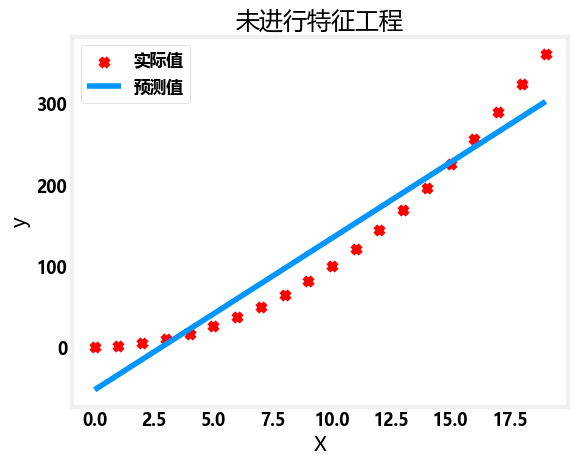

In [3]:

# 创建目标数据
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)
plt.rc("font",family='MicroSoft YaHei',weight="bold")
plt.scatter(x, y, marker='x', c='r', label="实际值"); plt.title("未进行特征工程")
plt.plot(x, X@model_w + model_b, label="预测值");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()



正如预期的那样，拟合效果不佳。所需要的是类似于$y= w_0x_0^2 + b$的形式，或者称之为**多项式特征**。为了实现这一点，你可以修改*输入数据*以*工程*所需的特征。如果你用一个平方$x$值的版本替换原始数据，那么你就可以得到$y= w_0x_0^2 + b$。让我们尝试一下。将`X`替换为`X**2`：

In [4]:


# 创建目标数据
x = np.arange(0, 20, 1)
y = 1 + x**2

# 工程特征 
X = x**2      #<-- 添加工程特征


Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


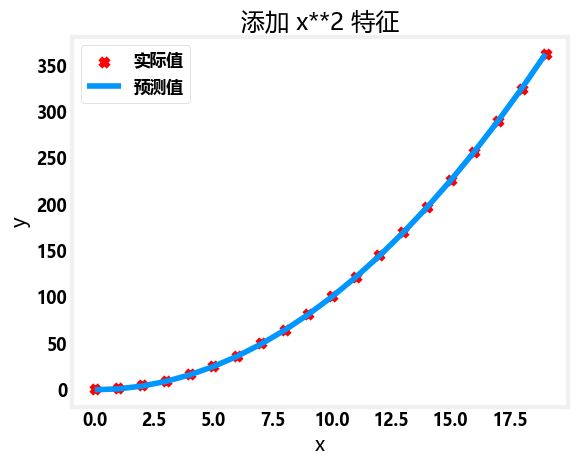

In [5]:


X = X.reshape(-1, 1)  #X应该是一个二维矩阵
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)

plt.scatter(x, y, marker='x', c='r', label="实际值"); plt.title("添加 x**2 特征")
plt.plot(x, np.dot(X, model_w) + model_b, label="预测值"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()



太棒了！几乎完美的拟合。注意图上方打印的$\mathbf{w}$和b的值：`w, b found by gradient descent: w: [1.], b: 0.0490`。梯度下降修改了我们的初始$\mathbf{w}$，$\mathbf{b}$的值为(1.0,0.049)，或者一个模型$y=1*x_0^2+0.049$，非常接近我们的目标$y=1*x_0^2+1$。如果你运行时间更长，可能会得到更好的匹配。

### 特征选择
<a name='GDF'></a>
在上面的例子中，我们知道需要一个$x^2$项。哪些特征是必需的可能并不总是明显的。你可以添加各种可能的特征来寻找最有用的特征。例如，如果我们尝试了$y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$会怎么样呢？

运行下面的代码。

In [6]:

# 创建目标数据
x = np.arange(0, 20, 1)
y = x**2

# 工程特征。
X = np.c_[x, x**2, x**3]   #<-- 添加工程特征

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


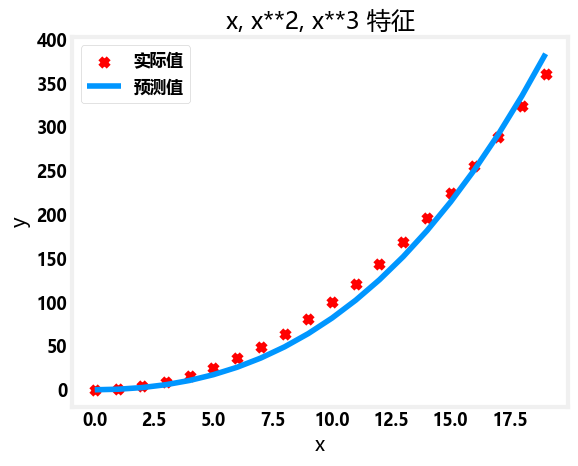

In [7]:

model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="实际值"); plt.title("x, x**2, x**3 特征")
plt.plot(x, X@model_w + model_b, label="预测值"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()



注意$\mathbf{w}$的值，`[0.08 0.54 0.03]`和b是`0.0106`。这意味着拟合/训练后的模型是：
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
梯度下降通过增加$w_1$相对于其他项的权重，强调了与$x^2$数据最匹配的数据。如果你运行时间更长，它将继续减小其他项的影响。
>梯度下降通过强调其相关参数来为我们挑选“正确”的特征。

让我们再次回顾一下这个想法：
- 首先，特征被重新缩放，以使它们可比较
- 更小的权值意味着更不重要/不正确的特征，而在极端情况下，当权值为零或非常接近零时，相关的特征对拟合数据没有用。
- 在上面的例子中，拟合后，与$x^2$特征相关的权值要比$x$或$x^3$的权值大得多，因为它对拟合数据最有用。

### 另一种观点
在上面，多项式特征是根据其与目标数据的匹配程度选择的。另一种思考方式是，一旦我们创建了新特征，我们仍然在使用线性回归。在这种情况下，最佳特征将相对于目标是线性的。这可以通过一个例子更好地理解。

In [8]:

 
# 创建目标数据
x = np.arange(0, 20, 1)
y = x**2

# 工程特征。
X = np.c_[x, x**2, x**3]   #<-- 添加工程特征
X_features = ['x','x^2','x^3']

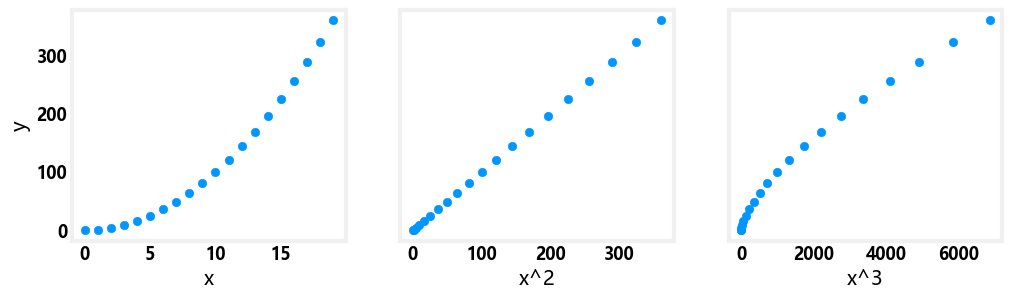

In [9]:


fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()




上面，很明显$x^2$特征与目标值$y$的映射是线性的。因此，一旦创建了这个新特征，线性回归可以很容易地使用它来生成模型。

### 特征缩放
正如上一实验中所述，如果数据集具有显著不同尺度的特征，应该对特征进行缩放以加速梯度下降。在上面的示例中，有$x$、$x^2$和$x^3$，它们自然具有非常不同的尺度。让我们对我们的示例应用Z-score标准化。

In [10]:

# 创建目标数据
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Raw X中每列的峰值到峰值范围:{np.ptp(X,axis=0)}")

# 添加均值标准化 
X = zscore_normalize_features(X)     
print(f"标准化后X中每列的峰值到峰值范围:{np.ptp(X,axis=0)}")

Raw X中每列的峰值到峰值范围:[  19  361 6859]
标准化后X中每列的峰值到峰值范围:[3.3  3.18 3.28]




现在我们可以尝试更大的alpha值：

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


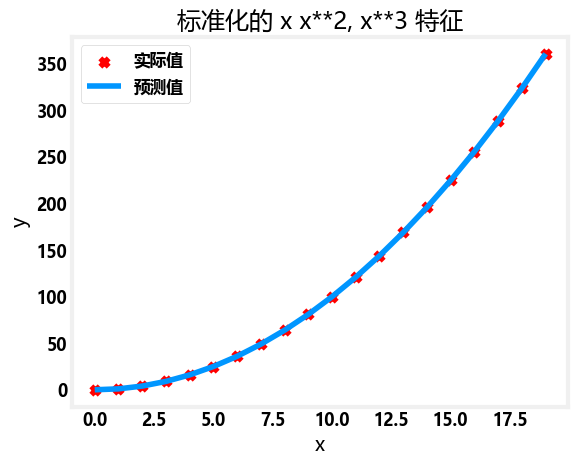

In [11]:


x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="实际值"); plt.title("标准化的 x x**2, x**3 特征")
plt.plot(x,X@model_w + model_b, label="预测值"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


特征缩放使得收敛速度更快。   
再次注意$\mathbf{w}$的值。$w_1$项，即$x^2$项，受到了最强调。梯度下降几乎消除了$x^3$项。

### 复杂函数
通过特征工程，甚至可以建模相当复杂的函数：

Iteration         0, Cost: 2.24887e-01
Iteration     10000, Cost: 4.26957e-02
Iteration     20000, Cost: 3.32065e-02
Iteration     30000, Cost: 2.92618e-02
Iteration     40000, Cost: 2.73901e-02
Iteration     50000, Cost: 2.63006e-02
Iteration     60000, Cost: 2.55129e-02
Iteration     70000, Cost: 2.48482e-02
Iteration     80000, Cost: 2.42397e-02
Iteration     90000, Cost: 2.36622e-02
w,b found by gradient descent: w: [-4.33e+00  5.90e+00  6.20e+00 -3.32e+00 -7.85e+00 -3.95e+00  6.95e+00
  8.83e-02  5.13e-03  1.94e-02  1.97e-02 -6.81e-02  5.42e-02], b: -0.0073


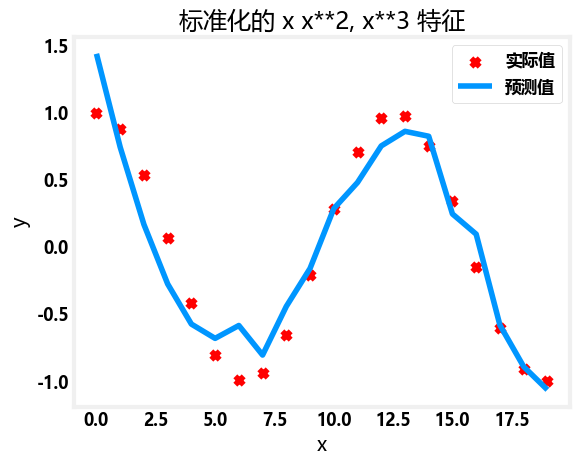

In [12]:


x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="实际值"); plt.title("标准化的 x x**2, x**3 特征")
plt.plot(x,X@model_w + model_b, label="预测值"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()




## 恭喜你！
在这个实验中，你：
- 学会了如何使用特征工程来模拟复杂，甚至高度非线性的函数
- 了解了在进行特征工程时应用特征缩放的重要性。